<a href="https://colab.research.google.com/github/thomasathul/AlgorithmCodes/blob/main/Copy_of_sensor_data_processing_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensor Data Processing: Building a Simple Step Counter

## Introduction

In this session, we will explore some of the steps for processing sensor data with python libraries, focusing on building a simple step counter as an illustrative example. This notebook has been adapted from https://aosabook.org/en/500L/a-pedometer-in-the-real-world.html

Remember to first save a copy of this notebook by clicking File > Save a copy in drive to start modifying it.

### Learning Outcomes

By the end of this session, you will:

1. Understand the basics of sensor data processing.
2. Gain practical experience with Python, scipy, numpy and Jupyter notebooks.
3. Learn how to extract meaningful insights from accelerometer data to count steps.
4. Explore key concepts such as signal filtering, fast fourier transform, peak detection and basic data visualization.

### Overview

The ability to process sensor data is crucial in various fields, including health monitoring, sports analytics, and Internet of Things (IoT) applications. In this notebook, we will walk through the process of creating a step counter using accelerometer data. Accelerometers measure acceleration, and by analyzing this data, we can infer the number of steps a person takes.

Here's a brief overview of what we'll cover:

1. **Setup and Data Collection:**
   - Import necessary libraries.
   - Simulate or load accelerometer data.

2. **Data Preprocessing:**
   - Clean and prepare the raw data.
   - Apply filtering techniques to remove noise.

3. **Feature engineering:**
   - Identify peaks as relevant features related to step detection.

4. **Step Counting Algorithm:**
   - Implement a basic step counting algorithm.

5. **Visualization:**
   - Visualize the processed data and step count.

You'll have the opportunity to apply your Python programming skills, gain a deeper understanding of filtering, and witness the transformation of raw sensor data into valuable information.

Let's dive in!

## Setup and Data Collection
For this tutorial, we are using an open dataset from the Oxford step counter project (https://oxford-step-counter.github.io). The dataset contains accelerometer data collected from a smartphone in various locations while walking. The data is sampled at 400Hz and contains 4 columns: timestamp, id, and x, y, z accelerometer readings. The timestamp is in nanoseconds, and the id is a unique identifier for the sensor.
The x, y, z columns contain the accelerometer readings in m/s^2.
We will use the wget command to download the dataset. We are downloading the back pocket data from the Pixel_Jamie_Hard_BackPocket_1 folder. The data is stored in a csv file. We will use the pandas library to read the csv file and plot the data.

### Import Libraries

In [1]:
import pandas as pd
from tqdm.auto import tqdm

### wget

To download the data we will use the wget command. wget is a command-line utility for downloading files from the web. It supports downloading files using various protocols, including HTTP, HTTPS, and FTP.  The basic syntax of wget is as follows:
wget [options] [URL]

In a Jupyter notebook, you can use a code cell with the ! prefix to run the shell command.

### Download Data

In [2]:
!wget -P ./ "https://raw.githubusercontent.com/Oxford-step-counter/DataSet/master/optimisation/data/Pixel_Jamie_Hard_BackPocket_1/accelerometer.csv" -O "backpocket-accelerometer.csv"

--2024-01-29 09:16:38--  https://raw.githubusercontent.com/Oxford-step-counter/DataSet/master/optimisation/data/Pixel_Jamie_Hard_BackPocket_1/accelerometer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2934254 (2.8M) [text/plain]
Saving to: ‘backpocket-accelerometer.csv’

ckpocket-accelerome 100%[===================>]   2.80M  --.-KB/s    in 0.07s   

2024-01-29 09:16:38 (41.4 MB/s) - ‘backpocket-accelerometer.csv’ saved [2934254/2934254]



### Questions
Throughout the notebook you will find some questions for you to answer. Create a new cell to write your answers. You can double click on the cell to edit it. You can also use markdown to format your answers. For more information on markdown, see https://www.markdownguide.org/basic-syntax/

1. What is the sampling frequency of the data?

2. What is the meaning of the -O option in the wget command?
3. Where is the file stored? What is the name of the file?

#### Your answers here

Solution 1. The sampling frequency of the data is given as 400Hz

Solution 2. The option -O in wget is used to concathenate the contents from the downloading target file and write those contents into a new file.

Solution 3. The downloaded files are stored in the current working directory where the command is run. (In the case of google colab, the file is saved in the google drive). The name of the file is given as **backpocket-accelerometer.csv**.

### Read Data
Now that we have downloaded the data, we can read it using the pandas library. Pandas is a Python library for data manipulation and analysis. It provides fast, flexible, and expressive data structures designed to make working with structured data intuitive. We will use the read_csv function to read the csv file. The read_csv function takes the path to the csv file as an argument. We will also specify the column names using the names argument. The names argument takes a list of column names. We will also specify the index_col argument to False. This will prevent pandas from using the first column as the index. We will also use the head function to display the first few rows of the data.

In [3]:
#read downloaded data and plot it
df = pd.read_csv('backpocket-accelerometer.csv', header=None, names=['timestamp', 'id', 'x', 'y', 'z'],index_col=False)
df.head()

,timestamp,id,x,y,z
0,584391996435789,3,-2.548301,4.267925,8.526270
1,584392016146510,3,-2.605781,4.241580,8.399334
2,584392035857231,3,-2.565066,4.282295,8.313113
3,584392055567952,3,-2.605781,4.267925,8.399334
4,584392075278545,3,-2.533931,4.315825,8.487949


Let's now plot the data. We will use the plot function from the pandas library to plot the data. The plot function takes the x and y arguments. The x argument specifies the column to use as the x axis, and the y argument specifies the column to use as the y axis. We will also use the figsize argument to specify the size of the figure. The figsize argument takes a tuple of two values. The first value specifies the width of the figure, and the second value specifies the height of the figure.

<Axes: xlabel='timestamp'>

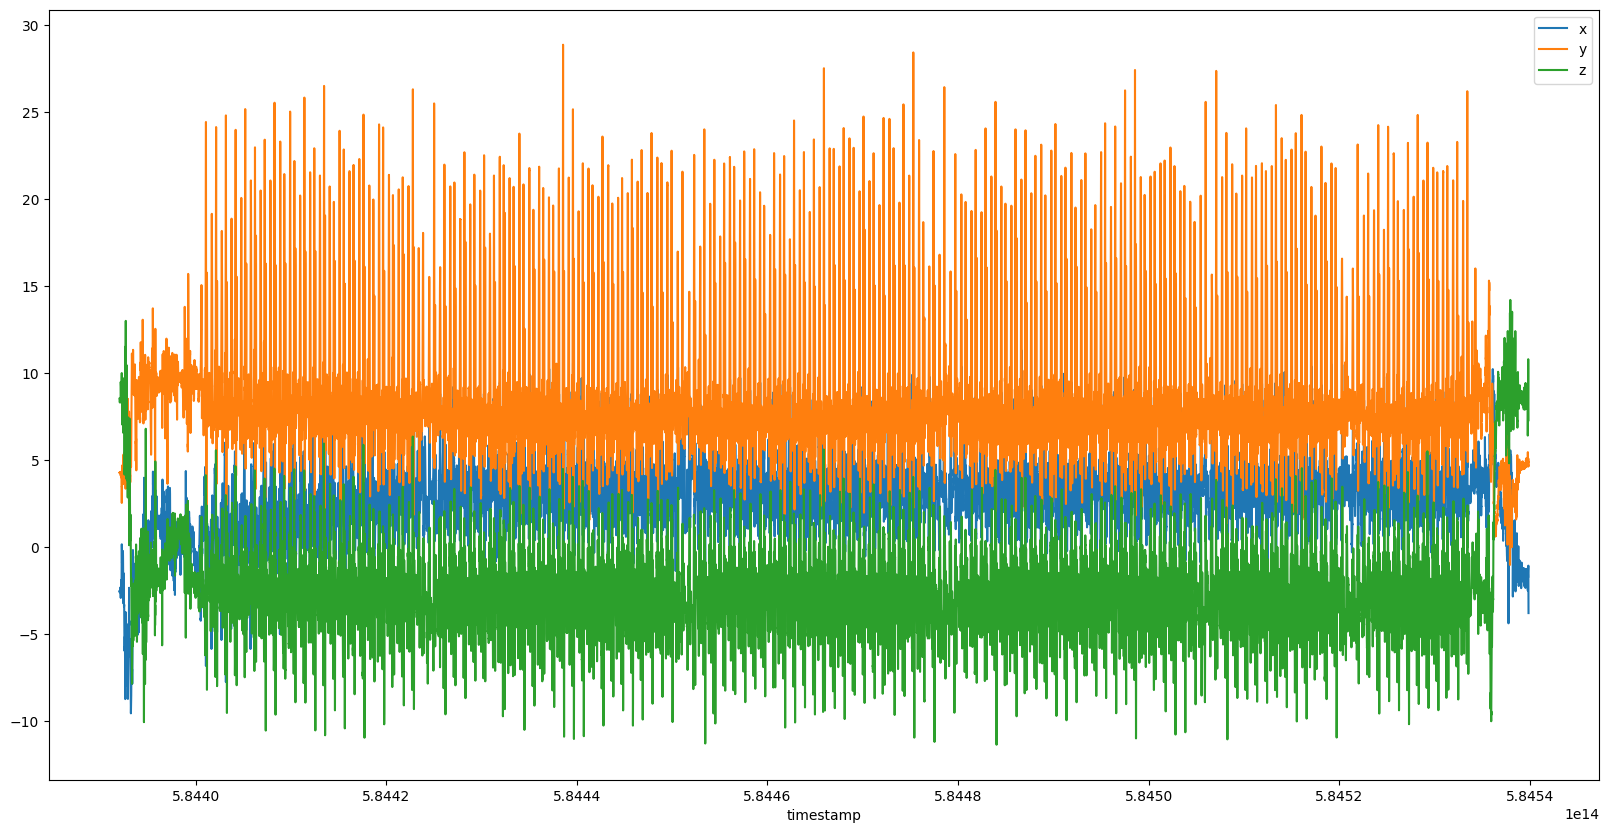

In [4]:
df.plot(x='timestamp', y=['x', 'y', 'z'], figsize=(20,10))

The data is from an accelerometer. "An accelerometer returns a signal in 3-dimensional space. A signal is a set of data points recorded over time. Each component of the signal is a time series representing acceleration in one of the x, y, or z directions. Each point in a time series is the acceleration in that direction at a specific point in time. Acceleration is measured in units of g-force, or g. One g is equal to 9.8 m/s2, the average acceleration due to gravity on Earth." [1]

### Questions
1. What is the meaning of the figsize argument?
2. What is the meaning of the x and y arguments?
3. What value is the y axis moving around? What meaning do you give to this value?

#### Your answers here

Solution 1. The figsize argument gives the size of the plotted figure. We can vary the width and height of the figure size using the figsize argument which helps us getting a better view of the plotted figure.

Solution 2. The x and y arguments gives the labels of x axis and y axis of the plotted figure.

Solution 3. The value in the y axis are the accelerometer reading in m/s^2 of the directions. The accelerometer readings can be used to measure the acceleration on each axes of directions. The value in y axis represents these accelerations.

## Data Preprocessing
Now that we have read the data, we can start preprocessing it. Data preprocessing is a crucial step in data analysis. It involves transforming raw data into an understandable format. Data preprocessing is often required to clean the data and prepare it for further analysis. In this section, we will clean the data and apply filtering techniques to remove noise.
First, we will check the sampling rate. The sampling rate is the number of samples per second. It is usually measured in Hertz (Hz). We will use the diff function to calculate the difference between two consecutive timestamps. We will then use the mode function to calculate the most common difference. We will then use the total_seconds function to convert the difference to seconds. We will use the 1/ operator to calculate the sampling rate.


In [5]:
#convert timestamp to datetime with unit nanosecons
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')
df.head()

,timestamp,id,x,y,z
0,1970-01-07 18:19:51.996435789,3,-2.548301,4.267925,8.526270
1,1970-01-07 18:19:52.016146510,3,-2.605781,4.241580,8.399334
2,1970-01-07 18:19:52.035857231,3,-2.565066,4.282295,8.313113
3,1970-01-07 18:19:52.055567952,3,-2.605781,4.267925,8.399334
4,1970-01-07 18:19:52.075278545,3,-2.533931,4.315825,8.487949


In [6]:
# get most common difference between two consecutive timestamps
mode_diff = df['timestamp'].diff().mode()[0].total_seconds()
print("Time difference between two samples in seconds : " , mode_diff)
#get sampling rate by taking the inverse of the difference
sampling_rate = 1/mode_diff
print("Sampling rate in Hz: " , sampling_rate)

Time difference between two samples in seconds :  0.002463
Sampling rate in Hz:  406.00893219650834


In [7]:
#get data frequency by taking the difference between two consecutive timestamps and getting the median - just checking if there are too many outliers
1/df['timestamp'].diff().median().total_seconds()


406.00893219650834

## Frequency Domain Representation
We can also obtain a frequency domain representation of the data. The frequency domain representation of a signal is a representation of the signal as a function of frequency. It provides information about the frequency components of the signal. We will use the fftpack library to obtain the frequency domain representation of the data. Let's first import the libraries we will be using

In [8]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

### Plotting the frequency domain representation of the data
To plot the frequency domain representation of the data, we will use the fft function from the fftpack library. The fft function takes the data as an argument. We will then use the fftfreq function to get the frequencies associated with the data points. The fftfreq function takes the number of data points and the sampling rate as arguments. Let's create a function to plot the frequency domain representation of the data so we can reuse it later.

In [9]:
#obtain a frequency domain representation of the data using fftpack
def plot_fft(data):
    y = data
    N = data.size # data size
    T = 1.0 / 400.0 # inverse of sampling rate
    x = np.linspace(0.0, N*T, N)
    yf = np.abs(fftpack.fft(y))
    print(yf)
    xf = fftpack.fftfreq(N, d=T)
    print(xf)

    fig, ax = plt.subplots()
    ax.plot(np.abs(xf), np.abs(yf))
    #truncate x axis to 50Hz
    ax.set_xlim(0, 20)
    plt.show()


[139862.19627658  28281.90598121  25569.61300097 ...  22455.35217345
  25569.61300097  28281.90598121]
[ 0.          0.00667089  0.01334178 ... -0.02001267 -0.01334178
 -0.00667089]


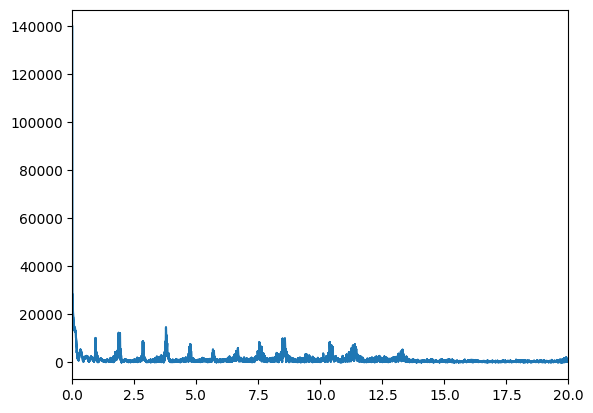

In [10]:
y = df['z'].values
plot_fft(y)

### Questions
1. What is the meaning of the N, T, x, yf, xf variables?
2. What is the meaning of the ax.plot function?
3. What is the meaning of the ax.set_xlim function?
4. What is the main frequency in the z axis?
5. Plot the frequency domain of the y axis. What is the main frequency?

Solution 1.


*   N variable - This is the total size of the data selected. In the above case, total size of z data column in the dataframe.
*   T variable - This is the sample period or inverse of sampling rate.It gives time difference between two consecutive samples.


*   x variable - This represents evenly spaced numbers from a start point to an end point.
*   yf variable - This gives the discrete fourier transform values of the data. The values are real numbers or complex. So we use numpy abs function to return the absolute value.

*   xf variable - This returns the discrete fourier transform values of the sampled frequencies. We use the length of the data and sampling period to calculate.







Solution 2.


*   ax.plot function - This creates a plot graph in the current axes i.e, ax of the figure. The frequency values are in the x axis and magnitude of these frequency components are in y axis.



Solution 3.

*   ax.set_xlim variable - This sets the limits of the values displayed in the x axis. It shows only the frequency components within the range of 0 to 20 Hz.



Solution 4.



*   The main frequency of z axis is at 18000HZ. The highest peak in the plot graph



Solution 5.



*   The main frequency of y axis is at 20000HZ.



[516813.58202026   5578.11276233   9881.02342517 ...  11446.89435364
   9881.02342517   5578.11276233]
[ 0.          0.00667089  0.01334178 ... -0.02001267 -0.01334178
 -0.00667089]


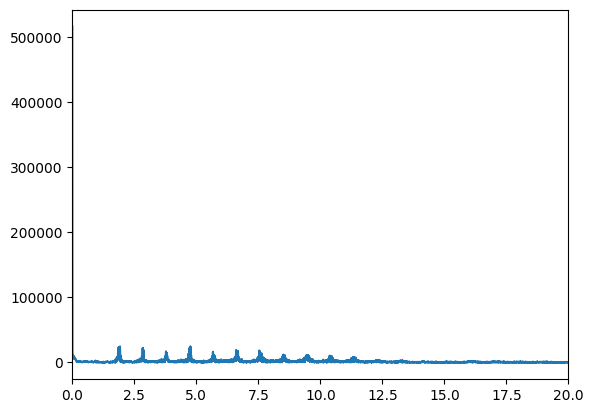

In [11]:
y = df['y'].values
plot_fft(y)

### Let's Talk About a Walk (extract form [1]

"When a person walks, they bounce slightly with each step.  While people don't bounce very far, only one or two centimeters, it is one of the clearest, most constant, and most recognizable parts of a person's walking acceleration signal.

A person bounces up and down, in the vertical direction, with each step. If you are walking on Earth (or another big ball of mass floating in space) the bounce is conveniently in the same direction as gravity.

We are going to count steps by using the accelerometer to count bounces up and down. Because the phone can rotate in any direction, we will use gravity to know which direction down is. A pedometer can count steps by counting the number of bounces in the direction of gravity.

An accelerometer can measure acceleration including gravity. We can use the accelerometer to measure the acceleration due to gravity, and then use that to know which direction down is. We can then count bounces in the direction of gravity. Gravity is a constant acceleration.



### Questions
1. What is the frequency of a constant value signal?
2. If you had to obtain only the gravity component of the signal, how would you do it? what type of filter would you use?

Solution 1.

The frequency of a constant value signal is 0. This is because frequency is determined as the number of cycle per second, and since there are no variations or cycles in a constant signal, the frequency is said to be 0.


Solution 2.

To obtain only the gravity component of the signal, we can use a low pass filter to achieve this. Low pass band allows the frequenices that are below the cutoff frequency and attenuates the higher frequencies. So the gravity component which is a constant can pass through as it is 0 Hz.

## Filtering
Filters are used to remove unwanted components from a signal. They are used to remove noise and extract relevant information from the signal. There are different types of filters, including lowpass, highpass, and bandpass filters. A lowpass filter allows low-frequency components to pass through while attenuating high-frequency components. A highpass filter allows high-frequency components to pass through while attenuating low-frequency components. A bandpass filter allows a specific range of frequencies to pass through while attenuating frequencies outside that range. We will use the butter function from the scipy library to create a lowpass filter. The butter function takes the filter order, cutoff frequency, sampling rate, and filter type as arguments. We will use the filtfilt function to apply the filter to the data. The filtfilt function takes the filter coefficients and the data as arguments. The filtfilt function will apply the filter twice, once forward and once backward. This will remove the phase shift introduced by the filter.

Let's create a function to apply a lowpass filter to the data.

In [12]:
#filter the data with a bandpass filter, 0.5Hz to 20Hz, frequency is 400Hz
from scipy import signal
from scipy.signal import butter, freqz, filtfilt

def lowpass_filter(data, low_cut_off=1, fs=400):
    b, a = butter(4, low_cut_off, fs=fs, btype='lowpass', analog=False)
    y = filtfilt(b, a, data)
    return b, a, y



Let's now create a function to plot the frequency response of the filter.
We will  use the freqz function to obtain the frequency response of the filter. The freqz function takes the filter coefficients as arguments and it returns the frequency response and the frequencies associated with the frequency response. The frequency response is high for frequencies that are allowed to pass through and low for frequencies that are attenuated.

We will then use the plot function to plot the frequency response. The axvline function will plot a vertical line at the cutoff frequency.

In [13]:
def plot_frequency_response(b, a, low_cutoff=0, high_cutoff=0, fs=400):
    # Plot the frequency response.
    w, h = freqz(b, a, fs=fs, worN=8000)
    plt.subplot(2, 1, 1)
    plt.plot(w, np.abs(h), 'b')
    if(low_cutoff > 0):
        plt.plot(low_cutoff, 0.5*np.sqrt(2), 'ko')
        plt.axvline(low_cutoff, color='k')
    if(high_cutoff > 0):
        plt.plot(high_cutoff, 0.5*np.sqrt(2), 'ko')
        plt.axvline(high_cutoff, color='k')

    plt.xlim(0, 20)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

Now we are ready to apply the filter to the data. We will use the lowpass_filter function to apply the filter to the x, y, z columns. We will then plot the filtered data. We want to obtain the gravity component of the signal so we will allow frequencies below 1Hz to pass through.
We will also plot the frequency response of the filter to see how it affects the data.

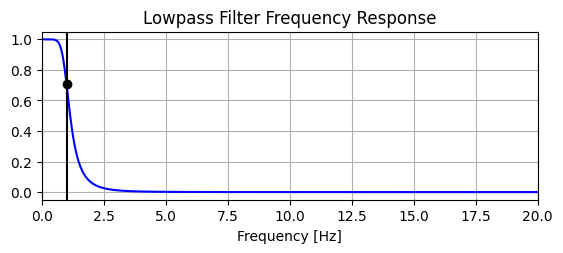

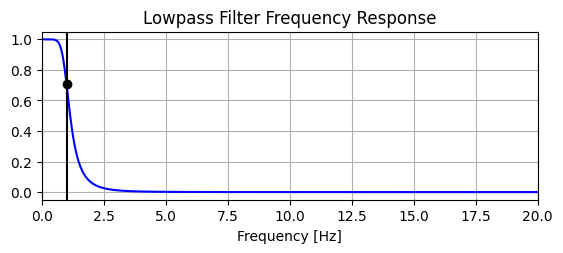

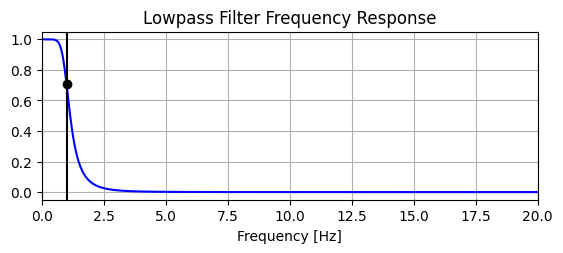

<Axes: >

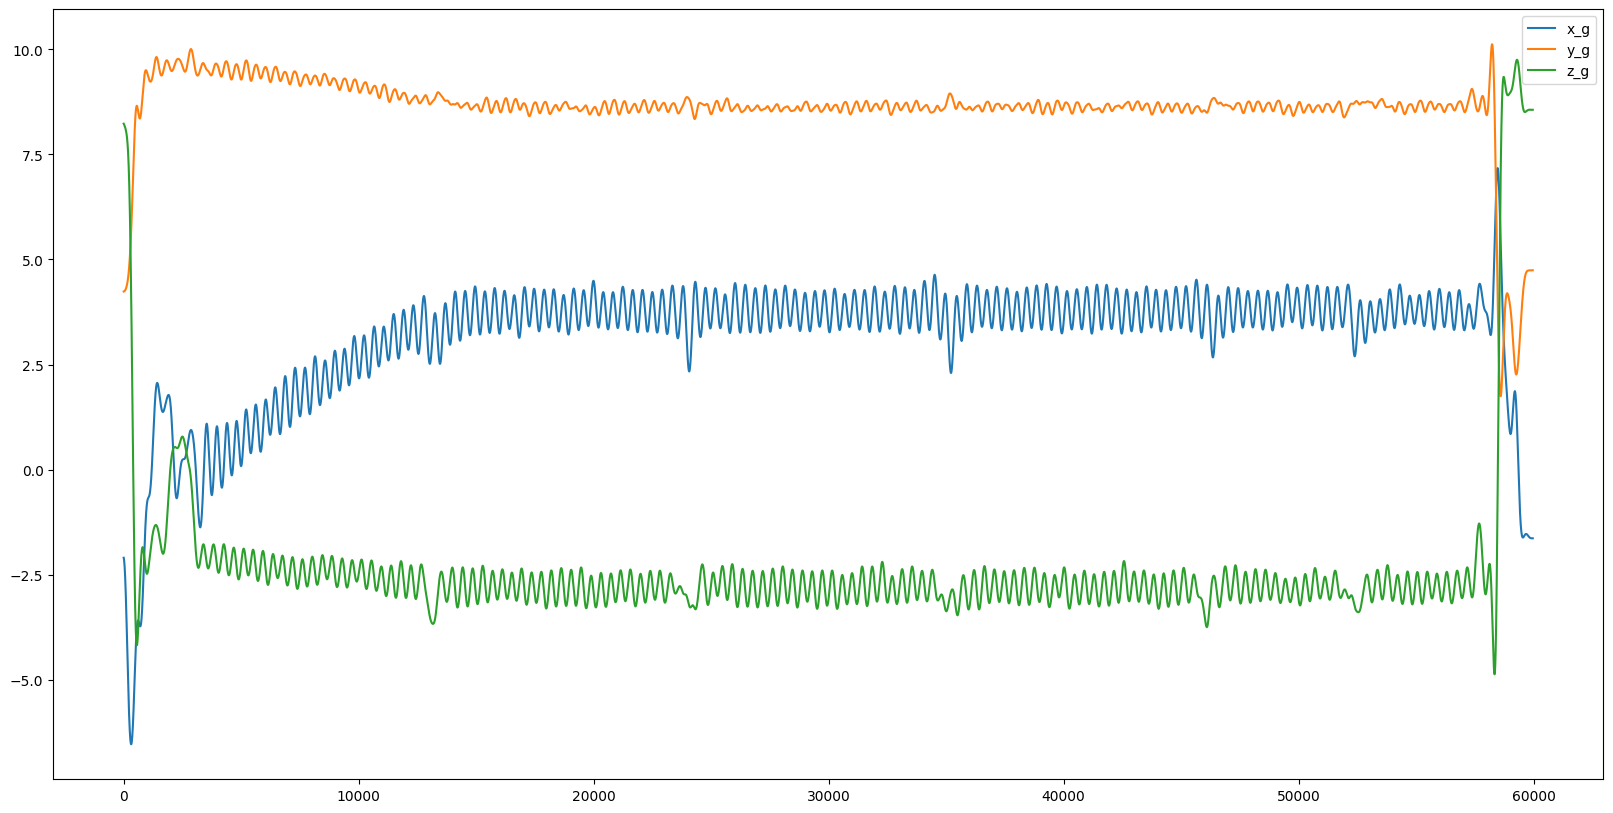

In [14]:
#obtain gravity component
b,a,df['x_g'] = lowpass_filter(df['x'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)
plt.show()
b,a,df['y_g'] = lowpass_filter(df['y'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)
plt.show()
b,a,df['z_g'] = lowpass_filter(df['z'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)
plt.show()

df[['x_g','y_g','z_g']].plot(figsize=(20,10))

Each time series measures the total acceleration in that direction. Total acceleration is the sum of user acceleration and gravitational acceleration.

User acceleration is the acceleration of the device due to the movement of the user, and is constant at 0 when the phone is perfectly still. However, when the user is moving with the device, user acceleration is rarely constant, since it's difficult for a person to move with a constant acceleration. User acceleration is the acceleration we want to measure to count steps.

TO obtain user acceleration we will subtract the gravity component from the total acceleration. We will create a new column for each axis to store the user acceleration.

<Axes: xlabel='timestamp'>

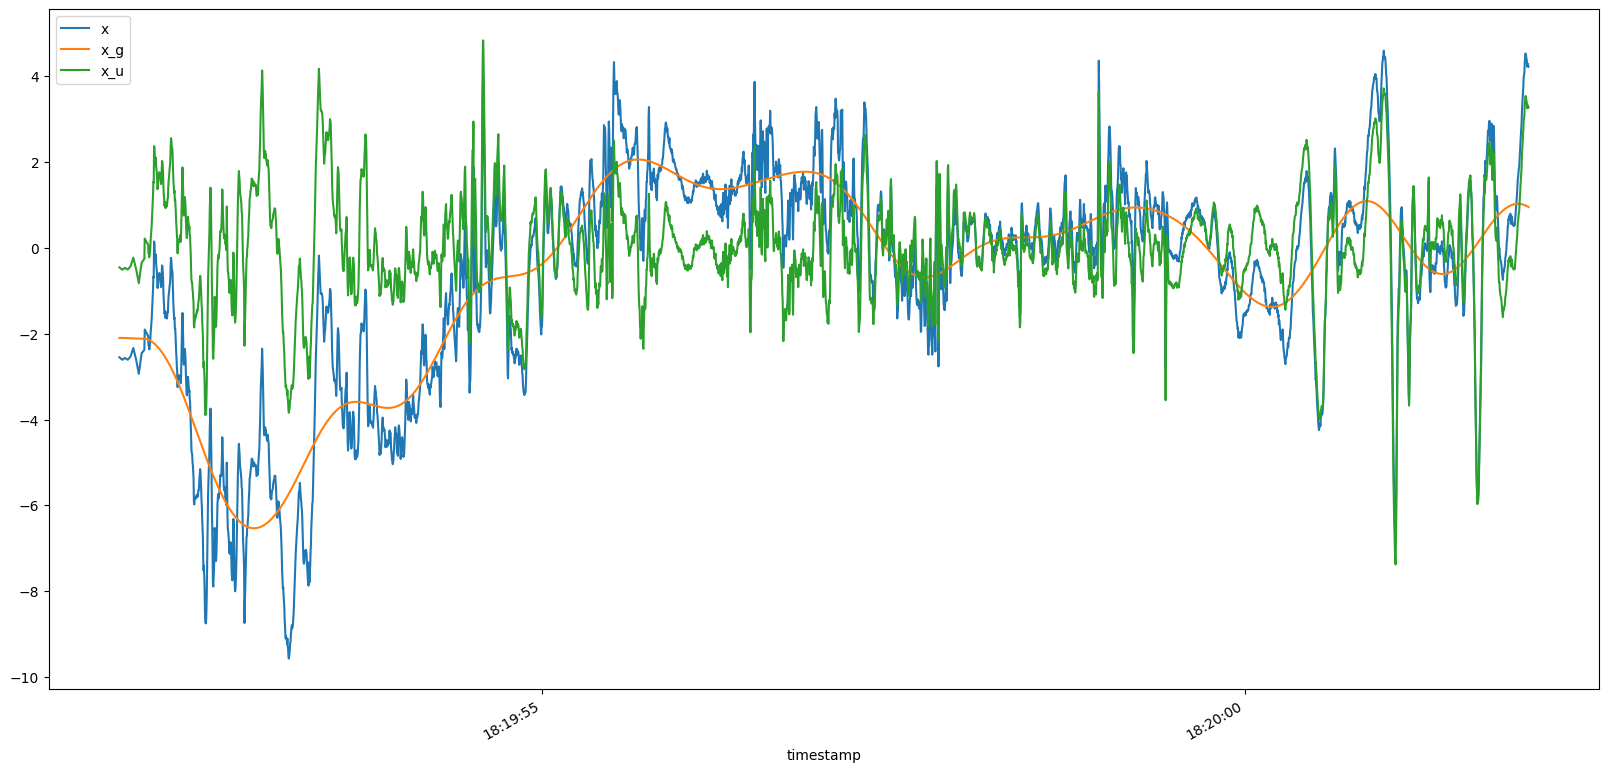

In [15]:
df['x_u'] = df['x'] - df['x_g']
df['y_u'] = df['y'] - df['y_g']
df['z_u'] = df['z'] - df['z_g']

#limit the plot to 10 seconds
df.head(4000).plot(x='timestamp', y=['x', 'x_g', 'x_u'], figsize=(20,10))

"xu(t) , yu(t), and zu(t) include all movements of the user, not just movements in the direction of gravity. Our goal here is to end up with a 1-dimensional time series representing user acceleration in the direction of gravity. This will include portions of user acceleration in each of the directions.

Let's get to it. First, some linear algebra 101. Don't take that mathematician hat off just yet!

###  The Dot Product

When working with coordinates, you won't get very far before being introduced to the dot product, one of the fundamental tools used in comparing the magnitude and direction of x, y, and z coordinates.

The dot product takes us from 3-dimensional space to 1-dimensional space. When we take the dot product of the two time series, user acceleration and gravitational acceleration, both of which are in 3-dimensional space, we'll be left with a single time series in 1-dimensional space representing the portion of user acceleration in the direction of gravity. We'll arbitrarily call this new time series a, because, well, every important time series deserves a name." [1]

<Axes: xlabel='timestamp'>

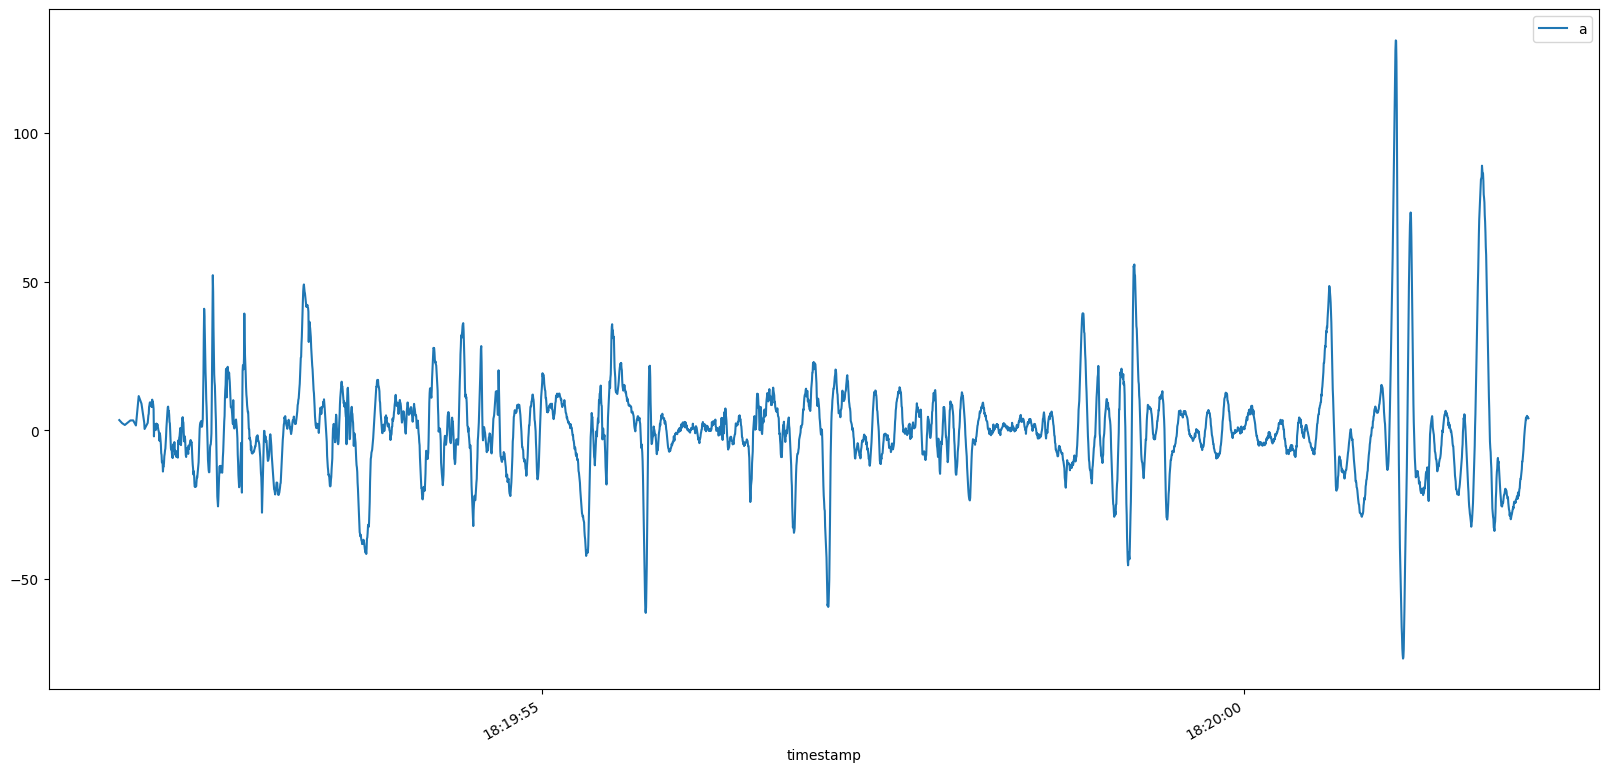

In [16]:
#dot product of g and u
df['a'] = (df['x_u'] * df['x_g']) + (df['y_u'] * df['y_g']) + (df['z_u'] * df['z_g'])
df.head(4000).plot(x='timestamp', y=['a'], figsize=(20,10))

### Questions
1. What is the meaning of the x_g, y_g, z_g, x_u, y_u, z_u, a columns?
2. What is the meaning of the dot product?
3. What is the meaning of the a column?

Solution 1.



*   x_g - This column represents the filtered acceleration due to gravity along the x axis.
*   y_g - This column represents the filtered acceleration due to gravity along the y axis.
*   z_g - This column represents the filtered acceleration due to gravity along the z axis.
*   x_u - This column represents the filtered user acceleration along the x axis.
*   y_u - This column represents the filtered user acceleration along the y axis.
*   z_u - This column represents the filtered user acceleration along the z axis.

*   a - This is the single time series derived from the result of dot product of the gravitational acceleration and the user acceleration at each point of time.










Solution 2.



*   Dot product takes a three dimensional space into a one dimensional space. The dot product can be used to learn about the magnitude and direction of the components. The dot product returns a single dimensional time series.




Solution 3.


*   a - This column represents the single time series value derived from the result of dot product of the gravitational acceleration and the user acceleration at each point of time.




## Step Counting
Now that we have obtained the user acceleration in the direction of gravity, we can start counting steps. We will use the find_peaks function from the scipy library to identify peaks in the data.
However, there are still some  issues with our a signal in its current state.
1. **jumpy peaks**: The peaks are jumpy. This is because the accelerometer is sensitive to noise, causing high frequency components to be present in the signal. We will remove frequencies above 5Hz as people have determined this is the highest frequency of a step.
2. **slow peaks** : with the high sampling rate, we can detect some peaks that are too slow to be a step. People have determined that the slowest steps are at 1Hz. We will remove frequencies below 1Hz.
3. **Short Peaks**: As a person is using an app or making a call, the accelerometer registers small movements in the direction of gravity, presenting themselves as short peaks in our time series. We can eliminate these short peaks by setting a minimum threshold, and counting a step every time a(t) crosses that threshold in the positive direction.


Let's first plot the frequency of the data to see what it looks like using the function we defined before

[9977.23907003  632.43941236  631.63402717 ...  711.08766585  631.63402717
  632.43941236]
[ 0.          0.00667089  0.01334178 ... -0.02001267 -0.01334178
 -0.00667089]


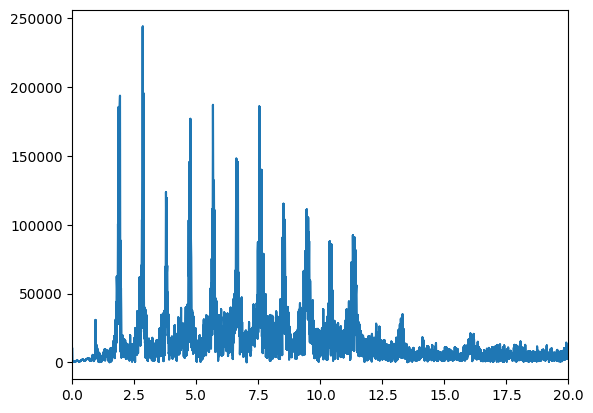

In [17]:
#obtain a frequency domain representation of the data using fftpack
plot_fft(df['a'].values)

### Questions
COmplete the following bandpass filter function to remove frequencies below low_cut_off and above high_cut_off. Use the butter function from scipy.signal to create the filter. Use the filtfilt function to apply the filter to the data.

The butter function takes the filter order, cutoff frequency, sampling rate, and filter type as arguments. To pass two frequencies, you can pass a list of frequencies to the cutoff frequency argument.

In [18]:
#remove frequencies below 1Hz and above 5Hz
def bandpass_filter(data, low_cut_off, high_cut_off, fs=400):
    b, a = butter(4, [low_cut_off, high_cut_off], fs=fs, btype='bandpass', analog=False)
    y = filtfilt(b, a, data)
    return b,a,y



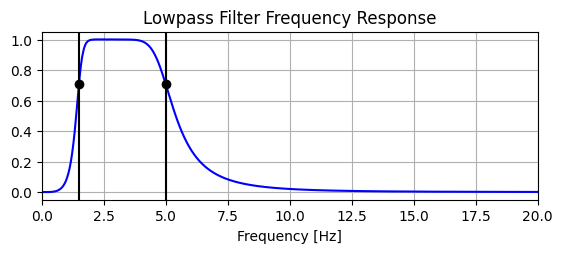

<Axes: xlabel='timestamp'>

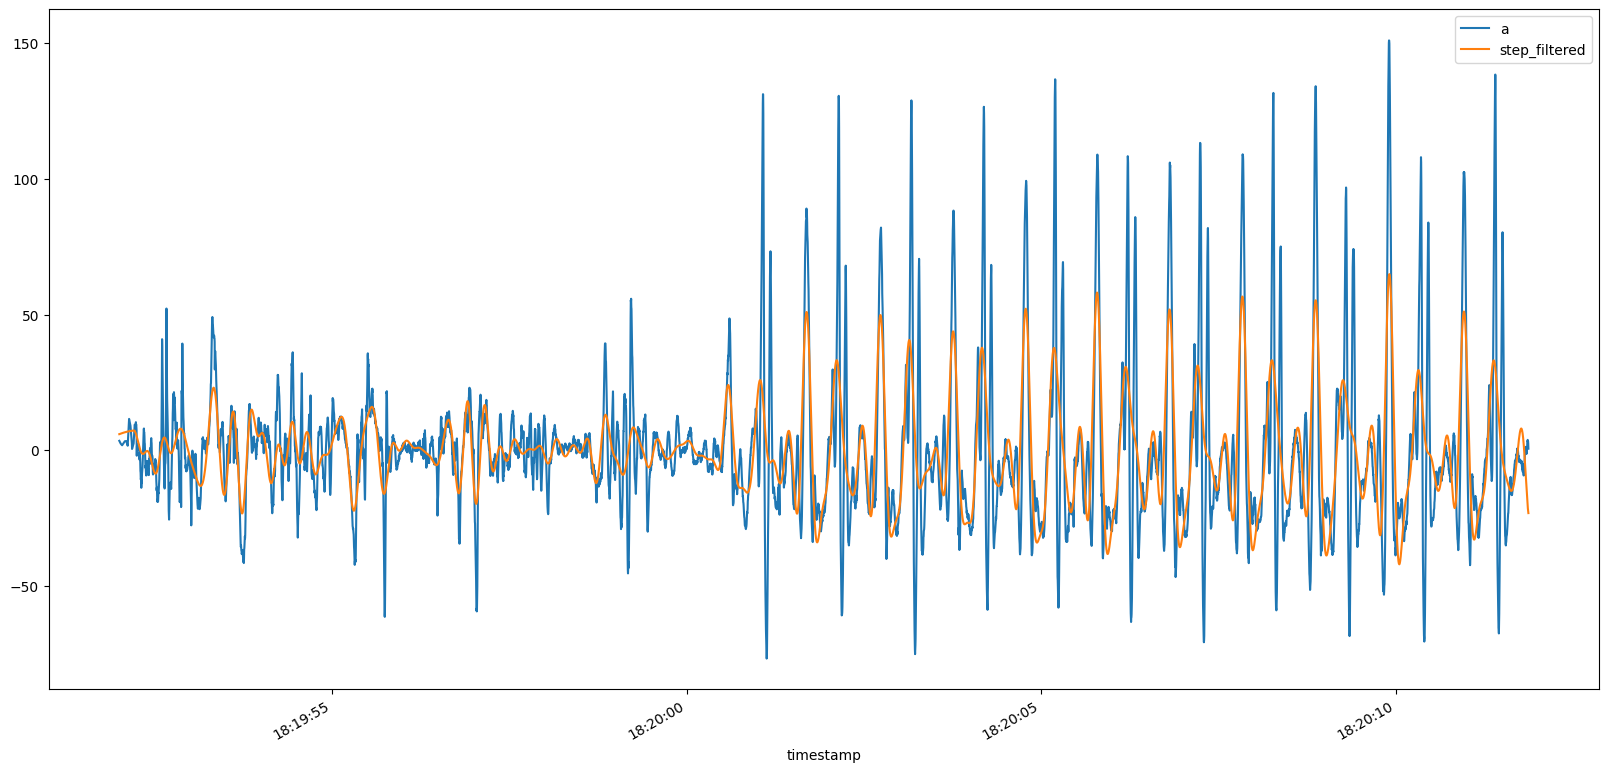

In [19]:
b,a, df['step_filtered'] = bandpass_filter(df['a'].values, 1.5, 5, fs=400)
plot_frequency_response(b, a, low_cutoff=1.5, high_cutoff=5, fs=400) #use to check your filter
plt.show()
df.head(8000).plot(x='timestamp', y=['a','step_filtered'], figsize=(20,10))

Now we are ready to find the peaks.
The find_peaks function takes the data as an argument and returns the indices of the peaks. THe second argument is the height argument. The height argument specifies the minimum height of the peaks. We will set the height to 0.1. This means that we will only detect peaks that are at least 0.1.
Finally, it will also take a distance argument. The distance argument specifies the minimum distance between two peaks. We will set the distance to 100. This means that we will only detect peaks that are at least 100 samples apart (0.25 seconds).
We will then create a new column to store the peaks. We will set the value of the peaks to 100 so we can easily visualize where they are.

<Axes: xlabel='timestamp'>

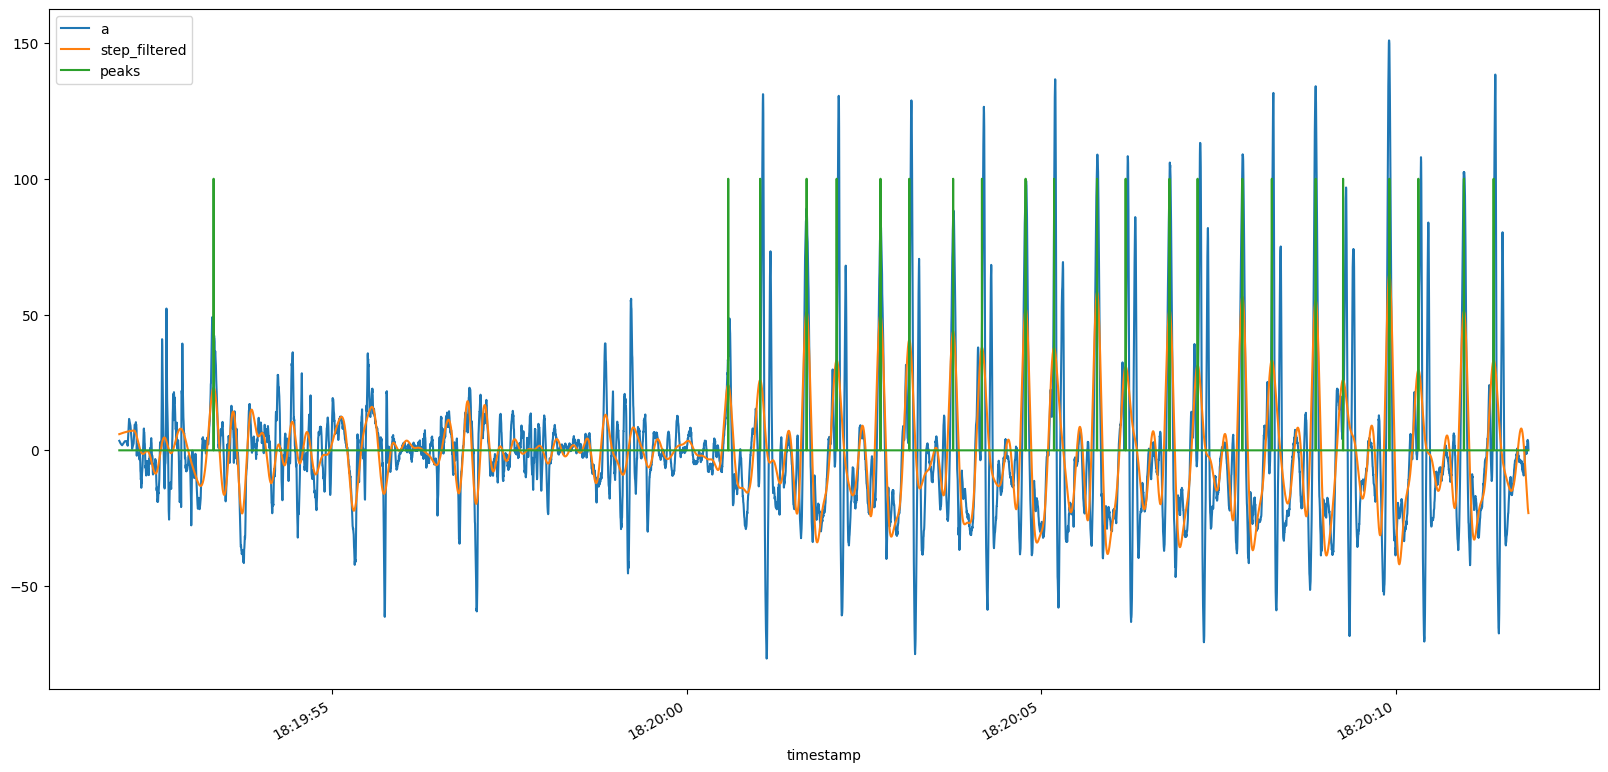

In [20]:
#peak detection
from scipy.signal import find_peaks
peaks, _ = find_peaks(df['step_filtered'].values, height=20, distance=100)
df['peaks'] = 0
df.loc[peaks, 'peaks'] = 100
df.head(8000).plot(x='timestamp', y=['a','step_filtered','peaks'], figsize=(20,10))

In [21]:
#count peaks by summing the peaks column and dividing by 100 (the value of the peaks)
df['peaks'].sum()/100


257.0

For this file, the expected number of steps is 257. How many steps did we find?

There is still one issue with our step counter:
4. **Bumpy Peaks**: Our pedometer should accommodate many people with different walks, so we've set minimum and maximum step frequencies based on a large sample size of people and walks. This means that we may sometimes filter slightly too much or too little. While we'll often have fairly smooth peaks, we can, once in a while, get a "bumpier" peak.

When bumpiness occurs at our threshold, we can mistakenly count too many steps for one peak. We'll use a method called hysteresis to address this. Hysteresis refers to the dependence of an output on past inputs. We can count threshold crossings in the positive direction, as well as 0 crossings in the negative direction. Then, we only count steps where a threshold crossing occurs after a 0 crossing, ensuring we count each step only once.

Let's find the time between two consecutive peaks. We will filter the dataset to only include the peaks. We will then use the diff function to calculate the difference between two consecutive timestamps.

### Implementing histeresis
We will now implement histeresis to remove the bumpy peaks. We will first identify zero crossings.
Take a look at the graph and identify a peak that doesn't follow a zero crossing.


<Axes: xlabel='timestamp'>

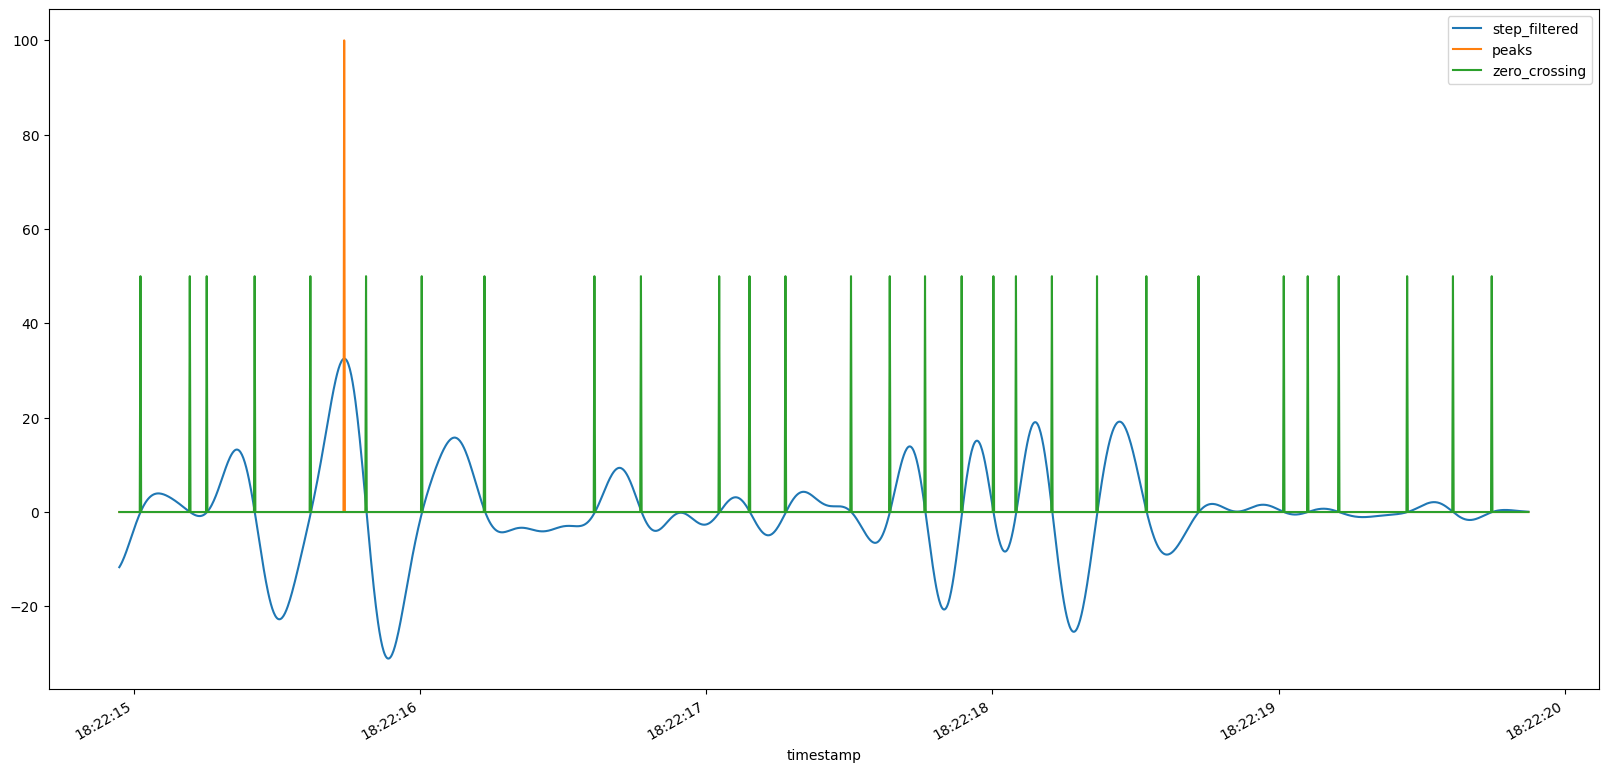

In [22]:
#find zero crossings
zero_crossings = np.where(np.diff(np.sign(df['step_filtered'].values)))[0]
df['zero_crossing'] = 0

df.loc[zero_crossings, 'zero_crossing']=50

df.tail(2000).plot(x='timestamp', y=['step_filtered','peaks', 'zero_crossing'], figsize=(20,10))

In [47]:
#filter only peaks and zero crossings
df_filtered = df[(df['peaks'] > 0) | (df['zero_crossing'] > 0)]
df_filtered['value'] = df_filtered['peaks'] + df_filtered['zero_crossing']
#find 100's in the value column that do not follow a 50 (diff is 0 if a peak follows another peak)
df_filtered[(df['peaks'] > 0) & (df_filtered['value'].diff()>0)].count()



<ipython-input-47-77f4992de053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = df_filtered['peaks'] + df_filtered['zero_crossing']
<ipython-input-47-77f4992de053>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df['peaks'] > 0) & (df_filtered['value'].diff()>0)].count()


timestamp        259
id               259
x                259
y                259
z                259
x_g              259
y_g              259
z_g              259
x_u              259
y_u              259
z_u              259
a                259
step_filtered    259
peaks            259
zero_crossing    259
value            259
dtype: int64

### Questions
1. What does the function np.diff do?
2. What is the meaning of the zero_crossings variable?
3. How many peaks do not follow a zero crossing?
4. How did you identify the peaks that do not follow a zero crossing?

Solution 1.

The np.diff calculates the difference between consecutive elements in an array. It returns a new array cintaining the difference between each element and its previous element.

Solution 2.

It refers to the indices in time series where signal crosses the zero line which means the signal changes to positive to negative or negative to positive. it is identified from the change of sign.

Solution 3.

To determine the number of peaks that do not follow zero crossing, we can find the difference between the total number of peaks and number of peaks that is zero crossing. Here, the number of peaks that do not follow zero crossing are 257.

Solution 4.

To identify the peaks that do not follow the zero crossing, we can use the np.diff() function to check whether the difference between the peak and the previous peak is more than 0. If the value is zero, then it is zero crossing. We choose the peaks that has value 50.

# Your turn
1. Play with the parameters of the step counter to make it closer to the expected value. What parameters can you change?
2. Download another file and find the number of steps from https://github.com/Oxford-step-counter/DataSet/tree/master ( Select one file and click on view raw data, use that url to download the file) THe expected number of steps is in the file "".
3. Compare the number of steps you found with the expected number of steps. How close are they? What can you do to make the step counter more accurate?
4. [OPTIONAL] Develop an android application to count steps. You can use the accelerometer sensor to collect the data. You can use the step counter algorithm you developed in this notebook. You can use the following tutorial to get started: https://developer.android.com/guide/topics/sensors/sensors_motion#sensors-motion-accel and the provided starter project.

Solution 1.

To make the step value more closer to the expected value, I changed the bandpass window size , low cutoff frequency to 1.5HZ. Also the distance and height of finding the peaks were modified to 20 and 100. The step counter will find the peaks which is 100 samples apart and which has the height of 20 or more. We filter more unwanted noise by this way.

Solution 2.

We make use of the data csv named "Pixel_Jamie_Carpet_InHand_2". We download the csv file using wget and find the number of steps from the accelerometer data.

In [49]:
!wget -P ./ "https://raw.githubusercontent.com/Oxford-step-counter/DataSet/master/optimisation/data/Pixel_Jamie_Carpet_InHand_2/accelerometer.csv" -O "inhand-accelerometer.csv"



--2024-01-29 09:50:29--  https://raw.githubusercontent.com/Oxford-step-counter/DataSet/master/optimisation/data/Pixel_Jamie_Carpet_InHand_2/accelerometer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2836280 (2.7M) [text/plain]
Saving to: ‘inhand-accelerometer.csv’

hand-accelerometer. 100%[===================>]   2.70M  --.-KB/s    in 0.07s   

2024-01-29 09:50:29 (39.1 MB/s) - ‘inhand-accelerometer.csv’ saved [2836280/2836280]



In [26]:
df = pd.read_csv('inhand-accelerometer.csv', header=None, names=['timestamp', 'id', 'x', 'y', 'z'],index_col=False)
df.head()

,timestamp,id,x,y,z
0,578417367436432,3,0.948428,5.343289,7.735913
1,578417387173393,3,0.440684,5.431904,7.862849
2,578417406910226,3,0.845442,5.036727,6.559959
3,578417409377296,3,0.974773,5.046306,7.793394
4,578417416778640,3,0.910107,5.096602,8.152647


<Axes: xlabel='timestamp'>

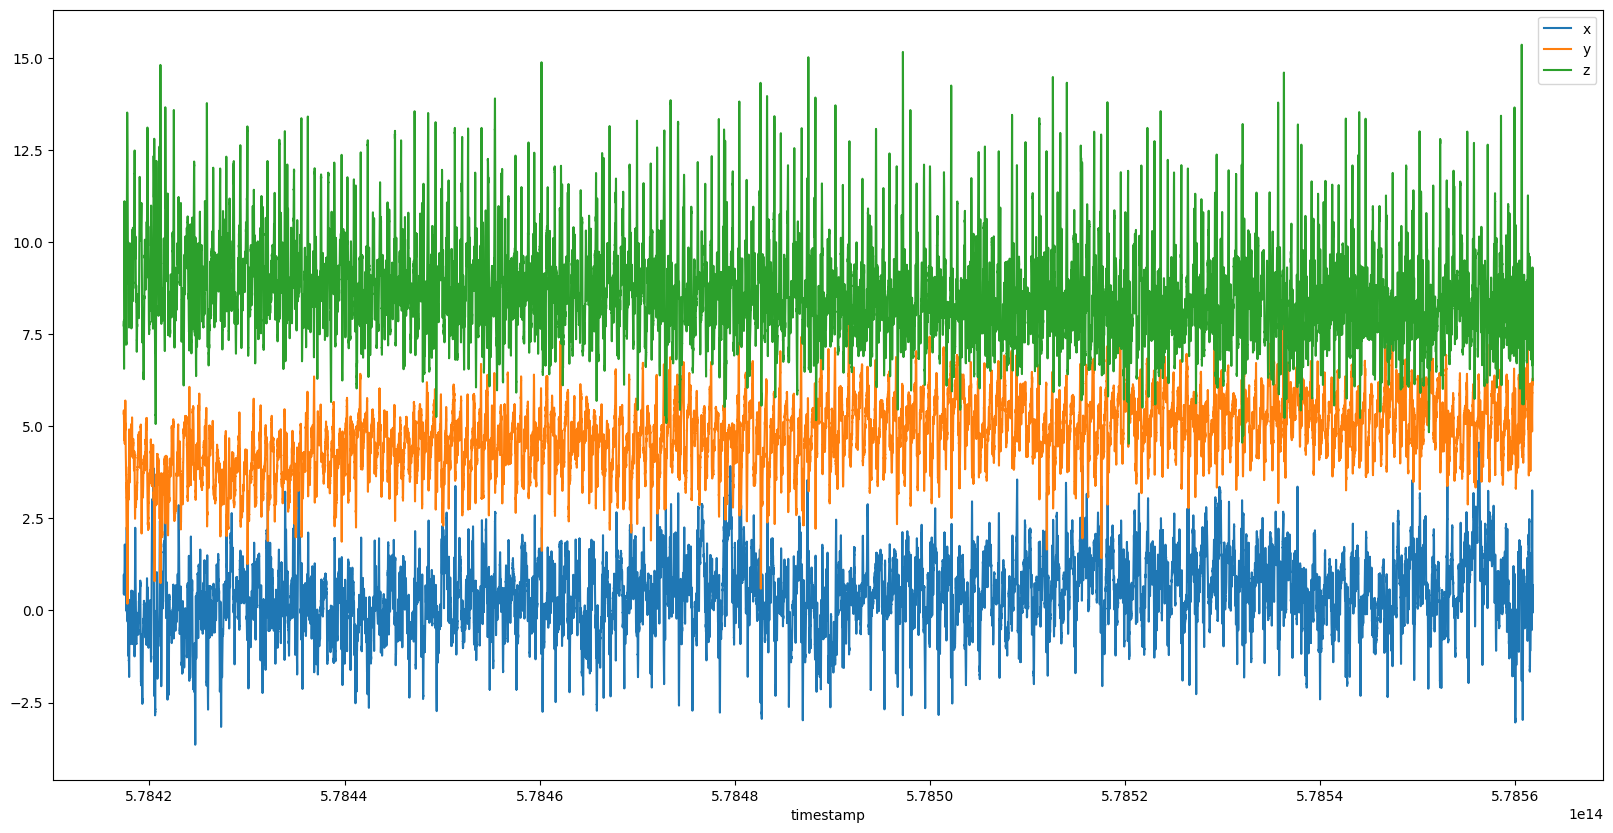

In [27]:
df.plot(x='timestamp', y=['x', 'y', 'z'], figsize=(20,10))

In [42]:
#convert timestamp to datetime with unit nanosecons
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')

In [29]:
# get most common difference between two consecutive timestamps
mode_diff = df['timestamp'].diff().mode()[0].total_seconds()
print("Time difference between two samples in seconds : " , mode_diff)
#get sampling rate by taking the inverse of the difference
sampling_rate = 1/mode_diff
print("Sampling rate in Hz: " , sampling_rate)
#get data frequency by taking the difference between two consecutive timestamps and getting the median - just checking if there are too many outliers
1/df['timestamp'].diff().median().total_seconds()

Time difference between two samples in seconds :  0.002466
Sampling rate in Hz:  405.5150040551501


405.5150040551501

[507430.9992273    8945.74408354   3738.11458429 ...   3454.1018516
   3738.11458429   8945.74408354]
[ 0.          0.00683469  0.01366937 ... -0.02050406 -0.01366937
 -0.00683469]


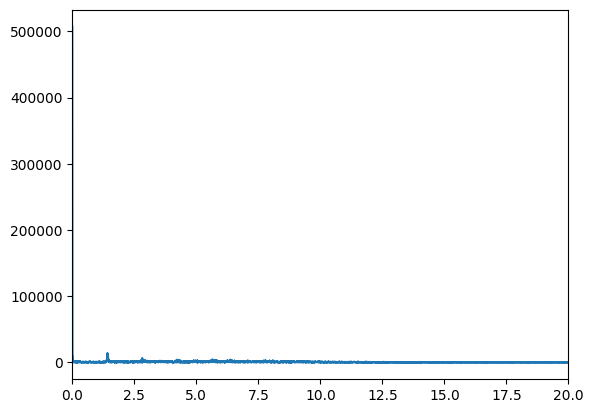

In [30]:
y = df['z'].values
plot_fft(y)

<Axes: >

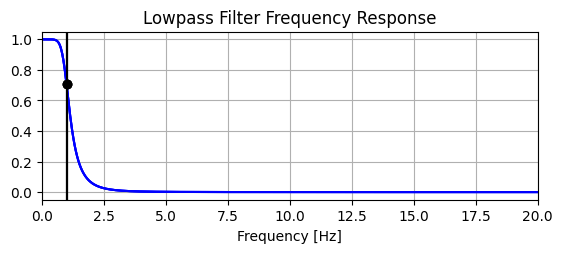

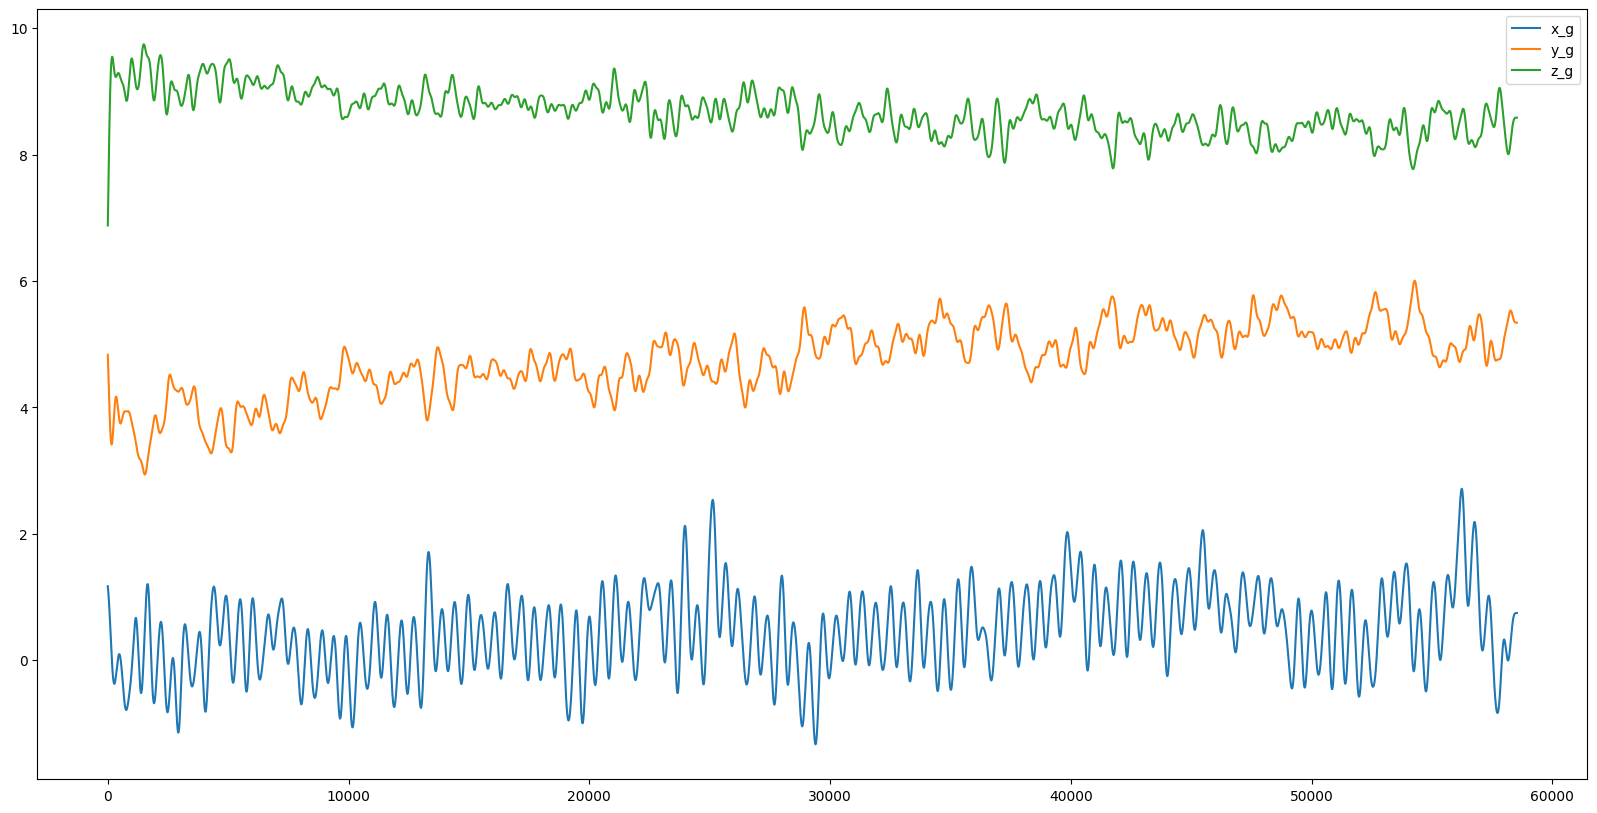

In [41]:
#obtain gravity component
b,a,df['x_g'] = lowpass_filter(df['x'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)

b,a,df['y_g'] = lowpass_filter(df['y'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)

b,a,df['z_g'] = lowpass_filter(df['z'].values, low_cut_off=1, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=0, fs=400)


df[['x_g','y_g','z_g']].plot(figsize=(20,10))

<Axes: xlabel='timestamp'>

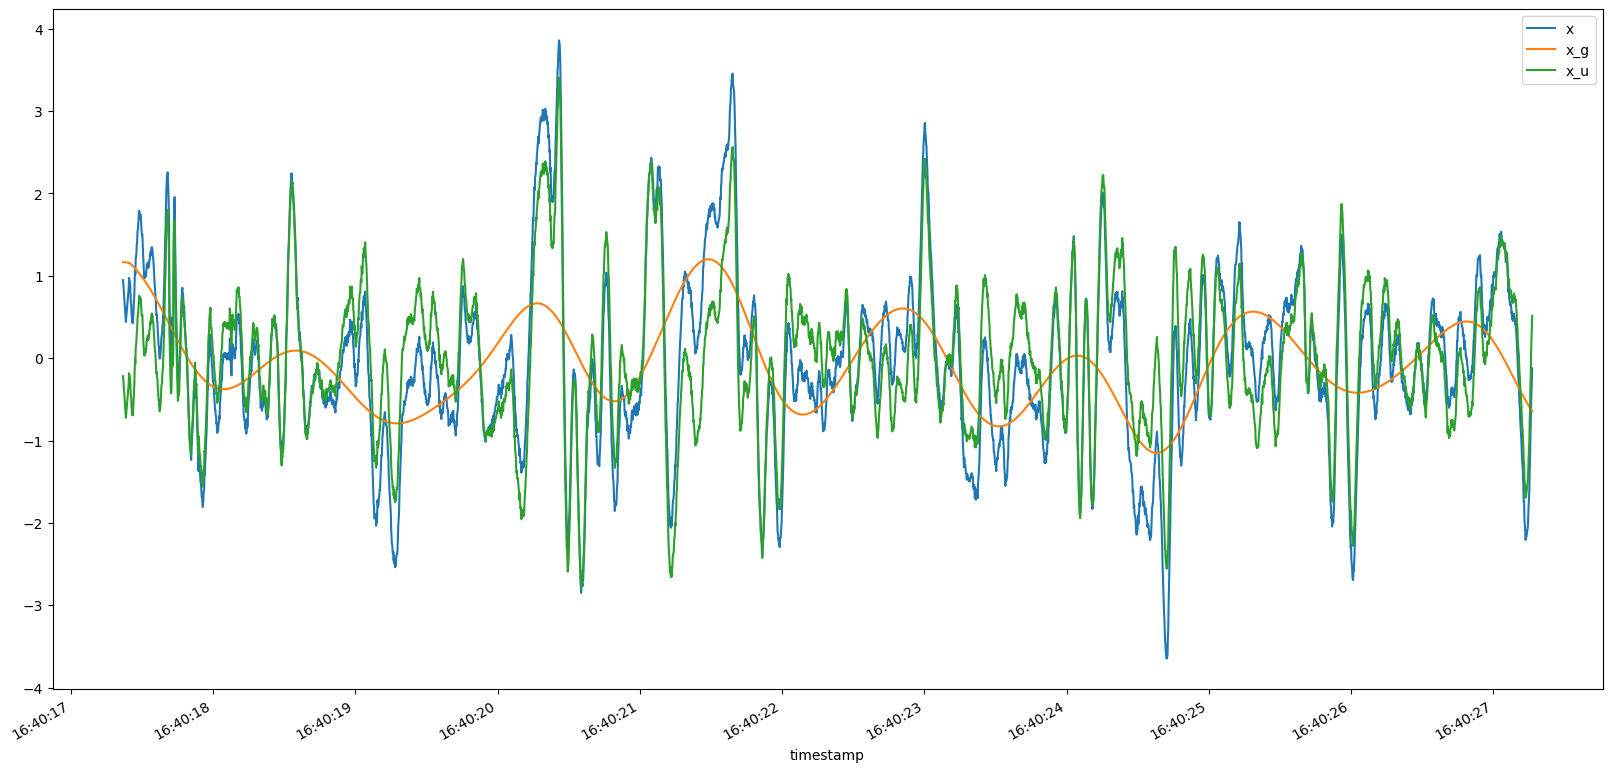

In [32]:
df['x_u'] = df['x'] - df['x_g']
df['y_u'] = df['y'] - df['y_g']
df['z_u'] = df['z'] - df['z_g']

#limit the plot to 10 seconds
df.head(4000).plot(x='timestamp', y=['x', 'x_g', 'x_u'], figsize=(20,10))

<Axes: xlabel='timestamp'>

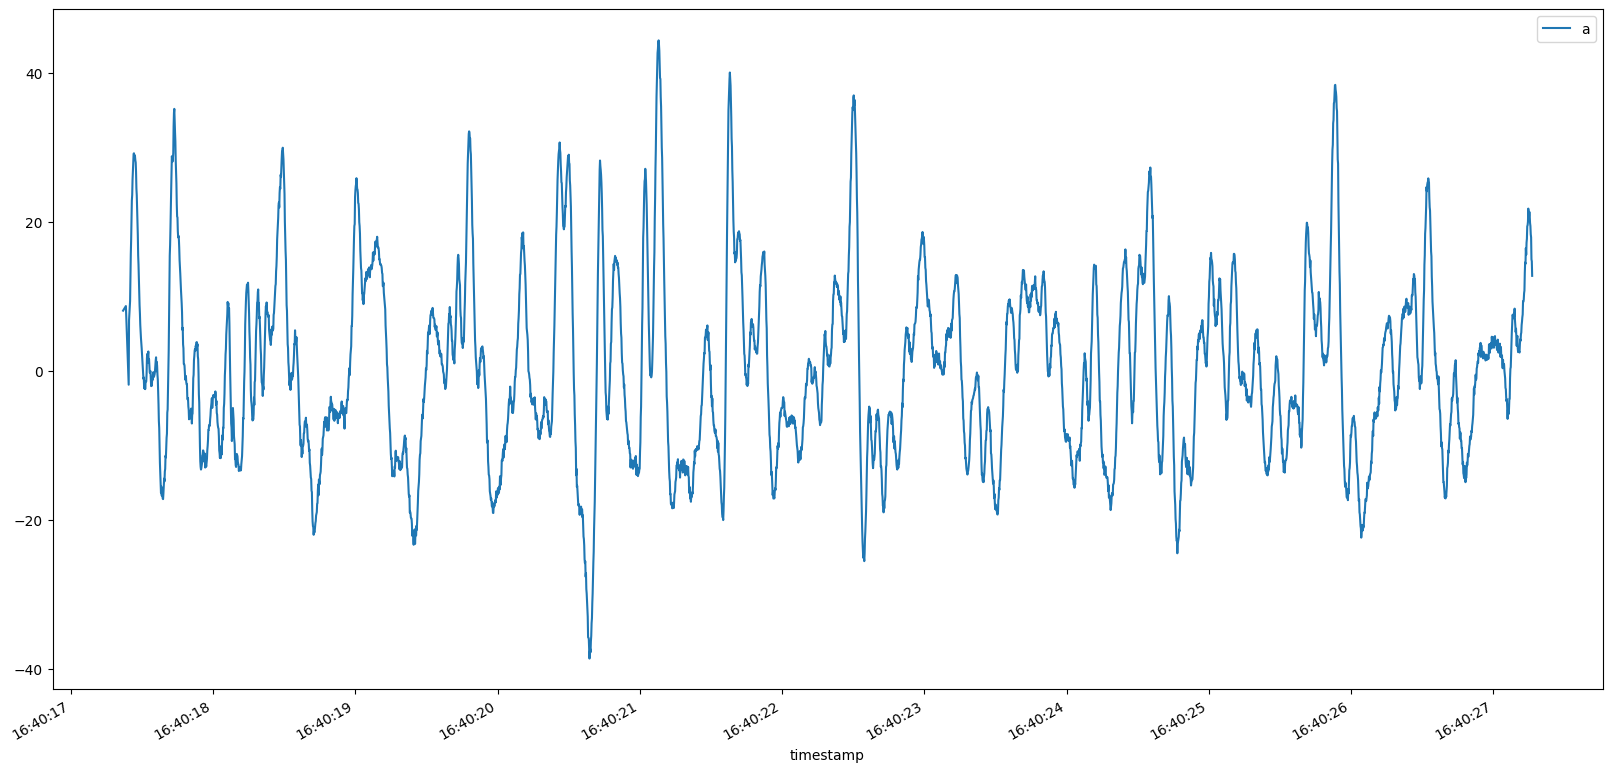

In [33]:
#dot product of g and u
df['a'] = (df['x_u'] * df['x_g']) + (df['y_u'] * df['y_g']) + (df['z_u'] * df['z_g'])
df.head(4000).plot(x='timestamp', y=['a'], figsize=(20,10))

[4197.31328629  199.53102672  696.36974387 ...  581.83545288  696.36974387
  199.53102672]
[ 0.          0.00683469  0.01366937 ... -0.02050406 -0.01366937
 -0.00683469]


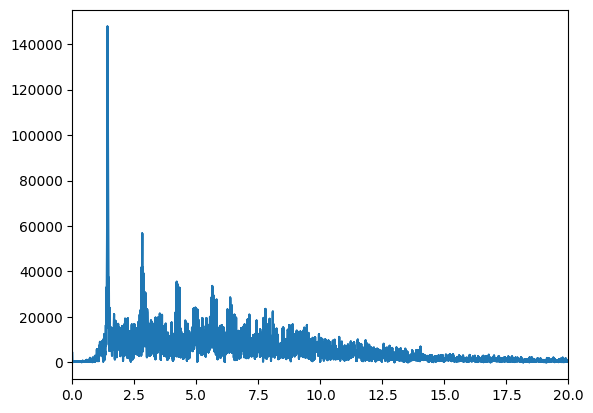

In [34]:
#obtain a frequency domain representation of the data using fftpack
plot_fft(df['a'].values)

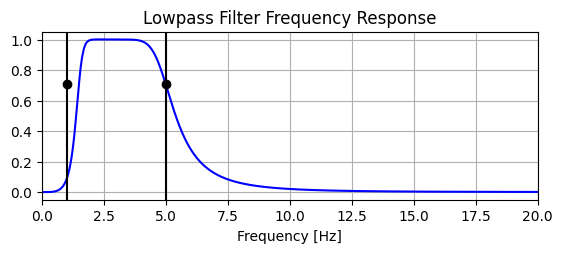

<Axes: xlabel='timestamp'>

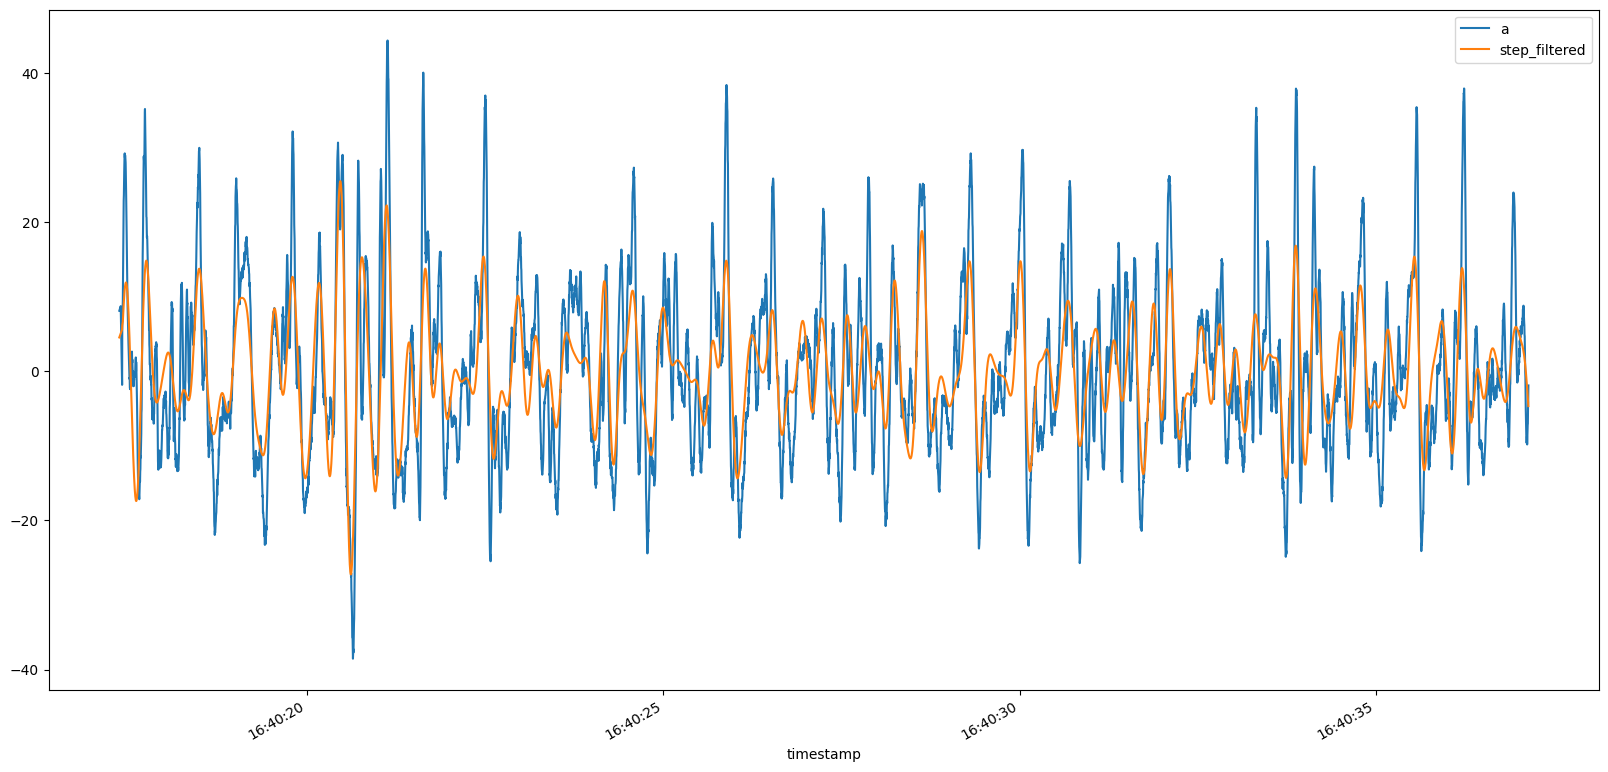

In [35]:
b,a, df['step_filtered'] = bandpass_filter(df['a'].values, 1.5, 5, fs=400)
plot_frequency_response(b, a, low_cutoff=1, high_cutoff=5, fs=400) #use to check your filter
plt.show()
df.head(8000).plot(x='timestamp', y=['a','step_filtered'], figsize=(20,10))

<Axes: xlabel='timestamp'>

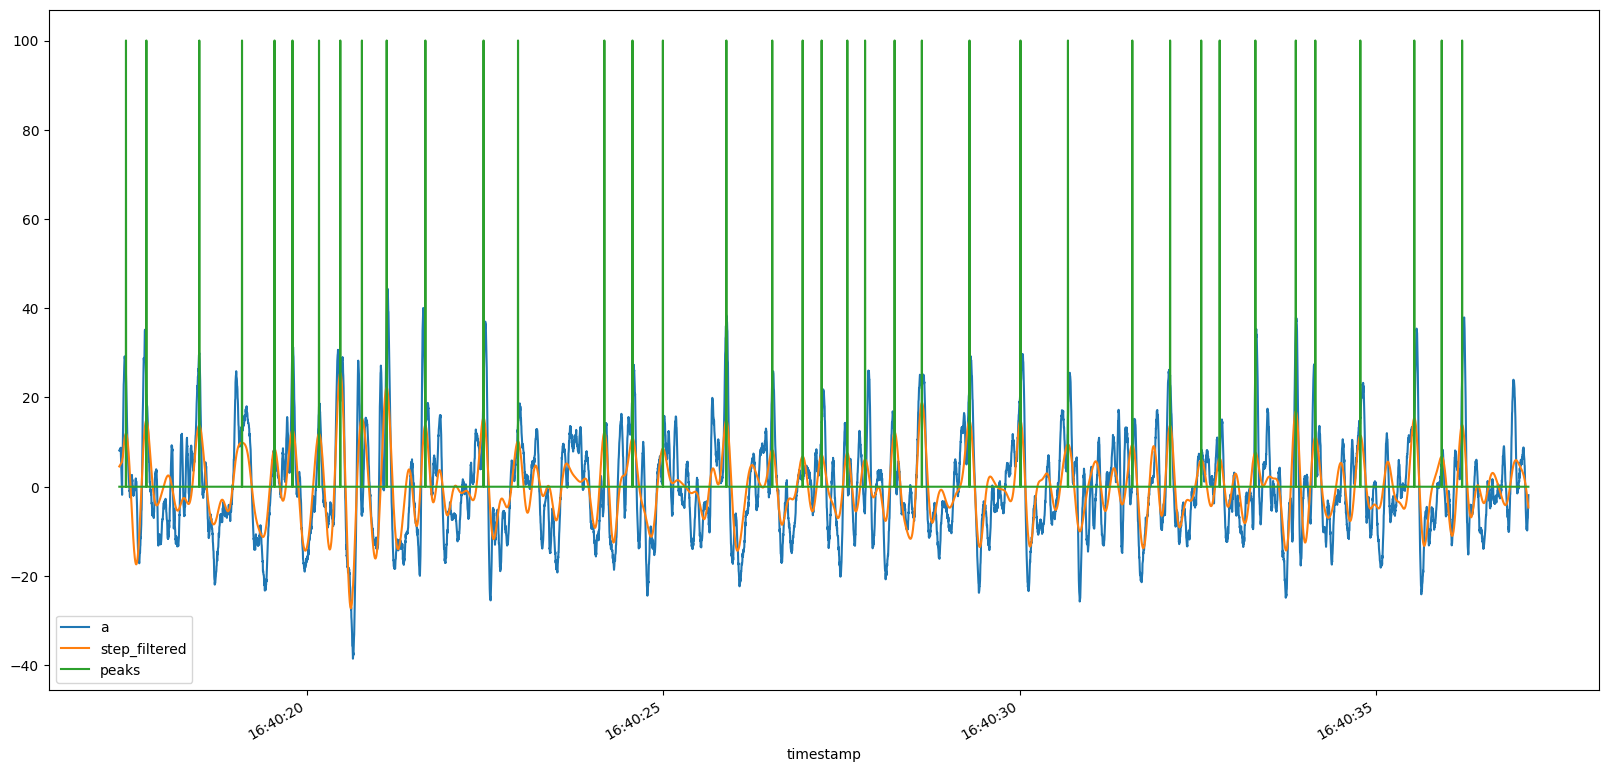

In [43]:
#peak detection
from scipy.signal import find_peaks
peaks, _ = find_peaks(df['step_filtered'].values, height=6, distance=100)
df['peaks'] = 0
df.loc[peaks, 'peaks'] = 100
df.head(8000).plot(x='timestamp', y=['a','step_filtered','peaks'], figsize=(20,10))

In [44]:
#count peaks by summing the peaks column and dividing by 100 (the value of the peaks)
df['peaks'].sum()/100

260.0

<Axes: xlabel='timestamp'>

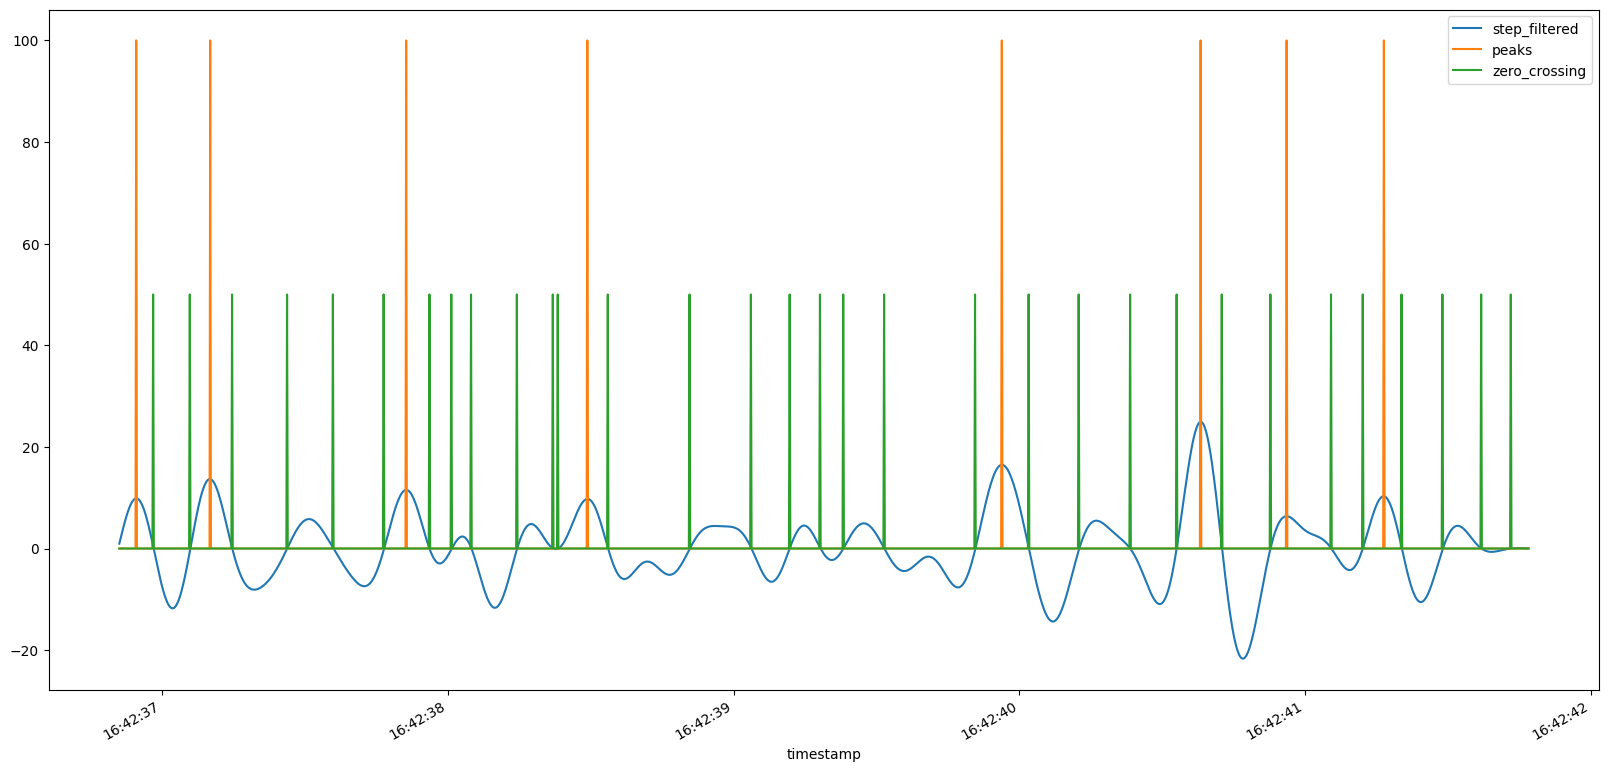

In [45]:
#find zero crossings
zero_crossings = np.where(np.diff(np.sign(df['step_filtered'].values)))[0]
df['zero_crossing'] = 0

df.loc[zero_crossings, 'zero_crossing']=50

df.tail(2000).plot(x='timestamp', y=['step_filtered','peaks', 'zero_crossing'], figsize=(20,10))

In [46]:
#filter only peaks and zero crossings
df_filtered = df[(df['peaks'] > 0) | (df['zero_crossing'] > 0)]
df_filtered['value'] = df_filtered['peaks'] + df_filtered['zero_crossing']
#find 100's in the value column that do not follow a 50 (diff is 0 if a peak follows another peak)
df_filtered[(df['peaks'] > 0) & (df_filtered['value'].diff()>0)].count()


<ipython-input-46-b90fe526d2e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = df_filtered['peaks'] + df_filtered['zero_crossing']
<ipython-input-46-b90fe526d2e3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered[(df['peaks'] > 0) & (df_filtered['value'].diff()>0)].count()


timestamp        259
id               259
x                259
y                259
z                259
x_g              259
y_g              259
z_g              259
x_u              259
y_u              259
z_u              259
a                259
step_filtered    259
peaks            259
zero_crossing    259
value            259
dtype: int64

Solution 3.

The expected value of the step counter is 255 steps and by analyzing the accelerometer data, we can obtain the steps close to 259 using our algorithm. By varying the height and distance in finding the peak, we are able to get a count closer to the expected number of steps.